Part II
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


how to move for random.triagualar -> stats.triang

c = (mode - left) / (right - left)

loc = left

scale = right - left

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [39]:
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[ 0.66292805  0.43519868  2.3569943   2.20694087  1.57667805  1.29439091
  0.89446123  1.49083931  3.04435663  2.20326837  2.47432035  0.4962278
  1.69752877  0.38632063  1.50238624 -0.75657443  1.01002547  0.95131211
  1.08607253 -1.02653465  1.1363121   0.13053462 -0.54500779  0.99161334
  3.34954528  0.66621741 -1.65975917 -0.63322609  0.2630385  -1.3061685
  3.39021301 -0.2509658   2.56998807 -0.35697734  1.26373755  0.65631116
  1.13505106  1.52263894  1.26629975  0.93050626  1.28765329  2.26799399
  1.25072791 -0.77662991  2.72595943  1.77859416  0.14278542  1.30782953
  0.0875241  -0.59126698 -1.49781827  1.46099951  1.21514463  1.98545422
  1.63842273  3.60784293  1.85443998 -0.92053901  2.67690343  1.71188892]


In [40]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 7
Длина интервала: 0.8571428571428571
Максимальный: 4
Минимальный элемент: -2 


In [41]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -2.0 - -1.1428571428571428
2 interval: -1.1428571428571428 - -0.2857142857142858
3 interval: -0.2857142857142858 - 0.5714285714285712
4 interval: 0.5714285714285712 - 1.4285714285714284
5 interval: 1.4285714285714284 - 2.2857142857142856
6 interval: 2.2857142857142856 - 3.1428571428571423
7 interval: 3.1428571428571423 - 4.0


In [42]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')

1 interval: 3
2 interval: 8
3 interval: 8
4 interval: 18
5 interval: 14
6 interval: 6
7 interval: 3

Сумма частот - 1.0


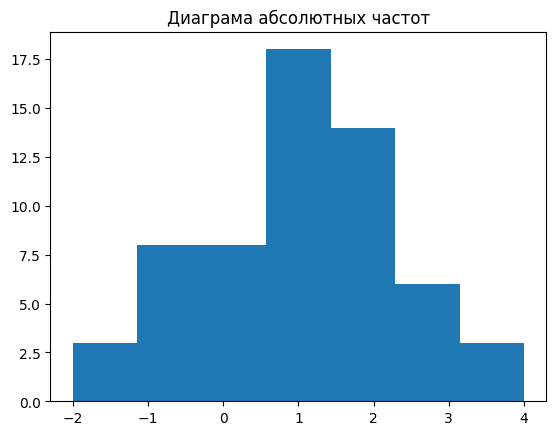

In [43]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [44]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.05833333333333334
2 interval: 0.15555555555555556
3 interval: 0.15555555555555556
4 interval: 0.35000000000000003
5 interval: 0.27222222222222225
6 interval: 0.11666666666666668
7 interval: 0.05833333333333334


[0.05833333 0.15555556 0.15555556 0.35       0.27222222 0.11666667
 0.05833333]
1.1666666666666667


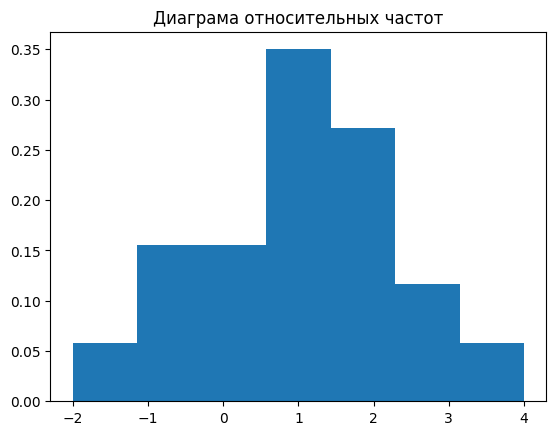

In [45]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

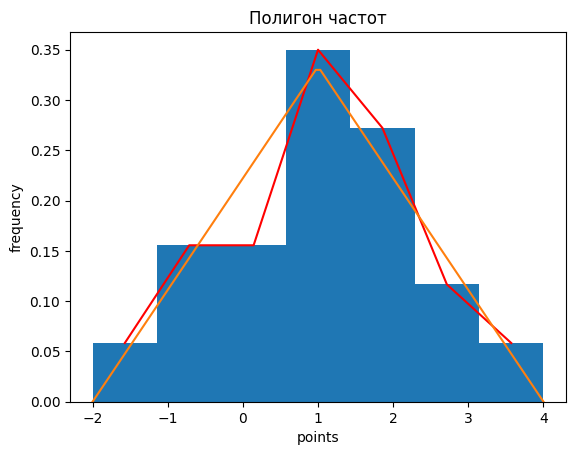

In [46]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.pdf(x, c=my_c, loc=my_loc, scale=my_scale))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [47]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  1.0


Function graph

In [48]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


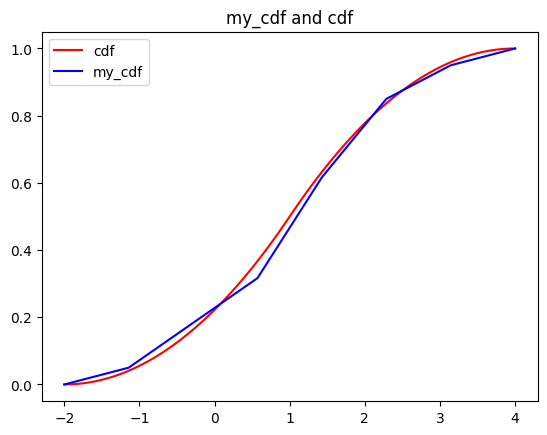

In [49]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.cdf(x, c=my_c, loc=my_loc, scale=my_scale), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,0.232975
0.50,1.175728
0.75,1.728565


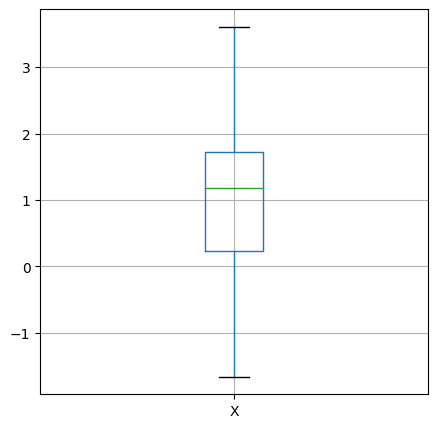

In [50]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [51]:
print(q)
print(f"Вероятность по lib {sts.triang.cdf(mode +(q*sigma), c=my_c, loc=my_loc, scale=my_scale)-sts.triang.cdf(mode -(q*sigma), c=my_c, loc=my_loc, scale=my_scale)}")

prob = 0
for i in sample:
    if i>mode -(q*sigma) and i<mode +(q*sigma):
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по lib 1.0
Статистическая 1.0


part 4

In [52]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 1.0286825597008218, 
variacne - 1.565509227801813, 
dev - 1.251203112129207, 
Skewness - -0.16553501578820984, 
Kurtosis - -0.4403765148968457


In [53]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')


x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 1.0286825597008218
Эмпирическая дисперсия: 1.5394174073384492
Стандартное отклонение: 1.2407326091219046
S^2: 1.5655092278018128
Коэффициент ассимметрии: -0.16553501578821006
Коэффициент эксцесса: -0.4403765148968448
